In [2]:
#Machine Learning 
#Dhruv Sharma:          s4055411
#Thoma Peyrou-Lauga:    s4086686
#Beer Honkoop:          s4016173
#Byron Rusch:           s3906442

# Part 1
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
from six import StringIO  
import requests
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from random import uniform as random_uniform
import warnings
from socket import socket

In [3]:
#
# Import given data
#

url1 = "https://jgmes.home.xs4all.nl/emc_neutron.txt"
s1 = requests.get(url1).content
d1 = pd.read_csv(StringIO(s1.decode('utf-8')))
print(d1)

url2 = "https://jgmes.home.xs4all.nl/emc_gam.txt"
s2 = requests.get(url2).content
d2 = pd.read_csv(StringIO(s2.decode('utf-8')))
print(d2)

             Th         Ph         E  ...       Z20       Z53    LatMom
0       49.9085    2.28061  0.201656  ...  0.845587  0.026810  0.681305
1       91.4437   50.85850  0.517213  ...  0.887481  0.024033  0.882948
2       21.5649  -15.09720  1.376870  ...  0.866884  0.015212  0.799525
3       92.4443    3.56594  0.956886  ...  0.734324  0.049628  0.908339
4      108.5060  -84.91500  0.759574  ...  0.883198  0.011530  0.944113
...         ...        ...       ...  ...       ...       ...       ...
43507  125.2240  -51.63240  0.646651  ...  0.960797  0.001582  0.880944
43508   48.2575   23.30530  1.096160  ...  0.868519  0.008453  0.982199
43509   92.8038  -43.53270  0.995061  ...  0.944732  0.008081  0.712000
43510  119.4840  128.11100  0.229870  ...  0.325275  0.066628  0.996153
43511  109.1130 -171.77200  0.437142  ...  0.851031  0.019229  0.966625

[43512 rows x 11 columns]
             Th          Ph        E  ...       Z20       Z53    LatMom
0       50.8457   -0.008022  1.67371 

In [4]:
d1[['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom']].describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000
mean,78.625170,0.705105,0.760000,13.929376,1.122564,0.341868,0.612911,0.893528,0.809153,0.034600,0.769180
std,47.212387,103.985196,0.502411,8.012129,0.381821,0.229777,0.176559,0.101082,0.209241,0.056912,0.276143
min,0.499105,-180.001000,0.024076,1.000000,1.000000,0.006992,0.171400,0.356098,0.000000,0.000000,0.000000
25%,37.196675,-89.329050,0.366767,8.000000,1.000000,0.168263,0.477409,0.838244,0.780414,0.007268,0.649031
50%,76.319900,1.788705,0.666409,13.000000,1.000000,0.299559,0.595015,0.916344,0.879204,0.016139,0.899504
75%,118.370000,90.577475,1.054273,19.000000,1.000000,0.467398,0.735480,0.976849,0.934041,0.034914,0.973680
max,178.647000,180.000000,3.832530,60.000000,6.000000,2.533030,1.000000,1.000000,1.000000,0.779841,0.999937


In [5]:
d2[['Th', 'Ph', 'E', 'NrHits', 'NrBumps', 'E1', 'E1E9', 'E9E25', 'Z20', 'Z53', 'LatMom']].describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,4.336000e+04,43360.000000
mean,80.749479,-0.410604,2.902359,19.744211,1.022163,1.967300,0.716676,0.963544,0.968002,2.808279e-03,0.482873
std,46.762866,103.996747,1.179884,5.893862,0.154851,0.900559,0.140513,0.036491,0.023344,4.033629e-03,0.244087
min,0.595195,-179.986000,0.025090,1.000000,1.000000,0.014021,0.224754,0.436667,0.350785,1.054230e-50,0.000000
25%,40.473675,-90.818675,1.905425,16.000000,1.000000,1.232017,0.620547,0.960356,0.966239,1.281237e-03,0.288124
50%,79.210700,-0.410285,2.895825,20.000000,1.000000,1.882490,0.754330,0.968749,0.972596,2.097985e-03,0.384048
75%,119.839750,88.966775,3.916097,24.000000,1.000000,2.640420,0.826166,0.976497,0.977766,3.251785e-03,0.700759
max,163.211000,179.958000,5.234740,47.000000,6.000000,4.369720,1.000000,1.000000,1.000000,3.341460e-01,0.996175


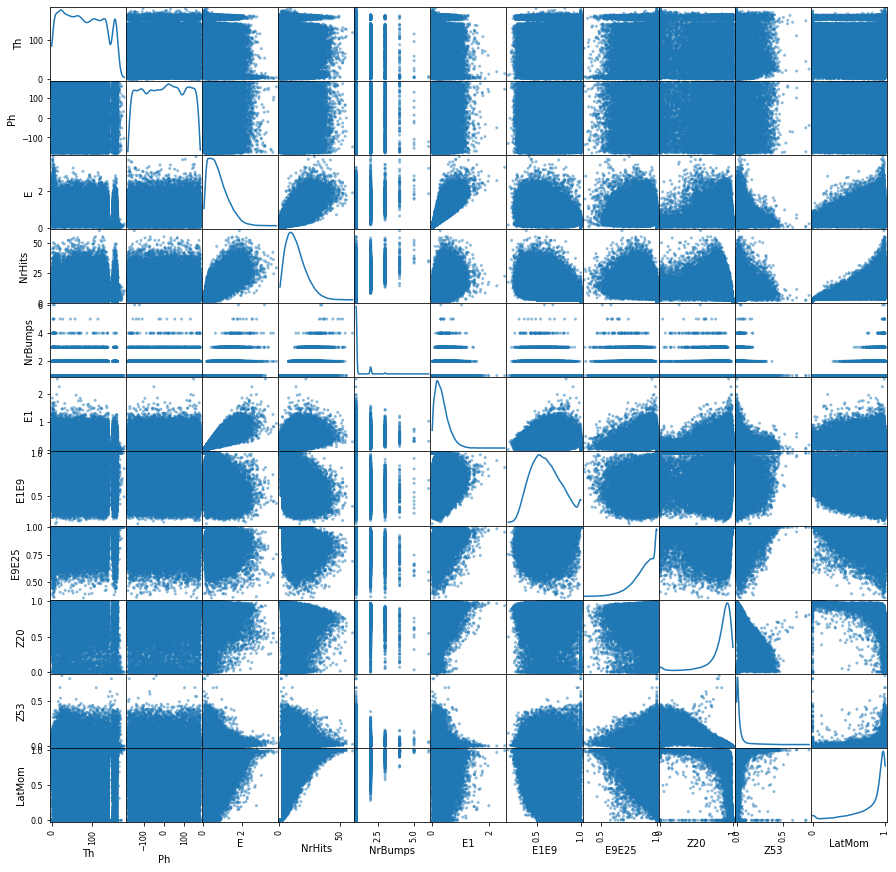

In [6]:
pd.plotting.scatter_matrix(d1, figsize=(15,15), diagonal='kde')
plt.show()

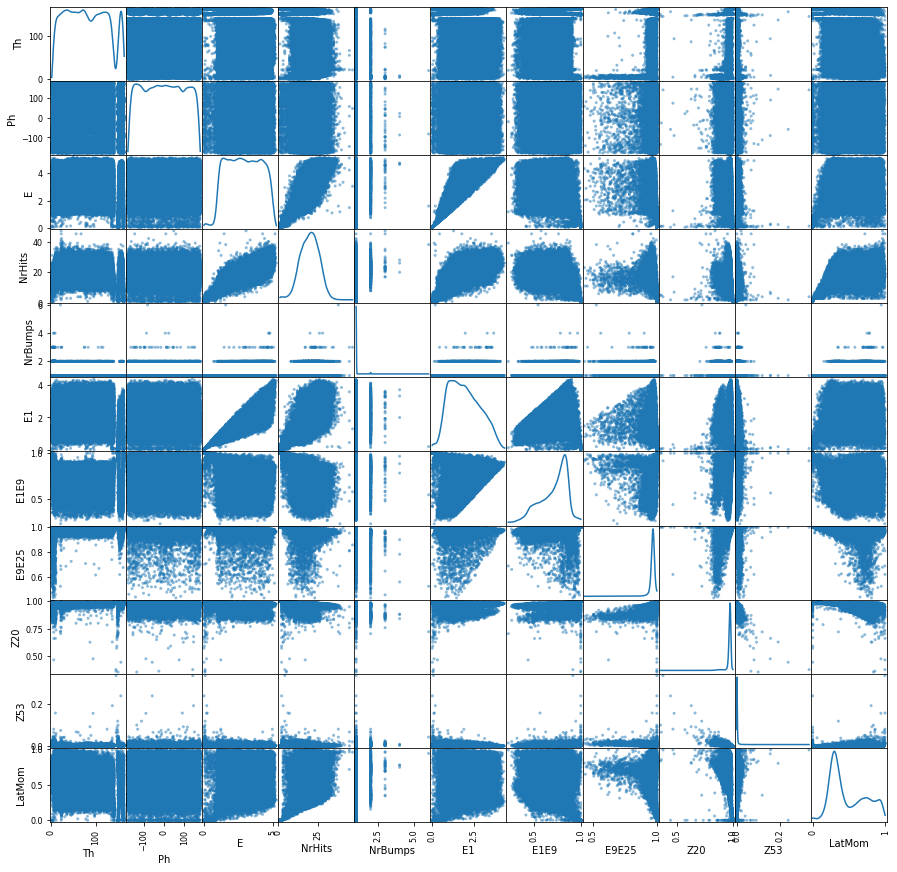

In [ ]:
pd.plotting.scatter_matrix(d2, figsize=(15,15), diagonal='kde')
plt.show()

In [ ]:
# Observations:
# Firstly, what we focus on is the kernel density distribution (kde) (on the diagonal):
# The objective is to find which parameter's peaks vary the most amongst the data sets.
# These paramters are: E, Nr Hits, E1, E9E25, LatMom.
# Scatterplots were of less use as there was simply more data recorded for gamma radiation
# NrBumps also varies significantly with respect to other parameters for the 2 data sets.
# Therefore, the most powerful parameters are the following: E, NrHits, NrBumps, E1, E9E25, LatMom, Z20

In [7]:
d1 = d1[:len(d2)] #slicing dataframes to ensure that theres the same amount of data in d1 and d2
print(len(d2))
print(len(d1))

43360
43360


In [8]:
#normalizing 
d1normal=[]
d2normal=[]

# creating new dataframes with the normalised values
d1normal.append((d1.E - d1.E.mean())/d1.E.std())
d1normal.append((d1.NrHits - d1.NrHits.mean())/d1.NrHits.std())
d1normal.append((d1.NrBumps - d1.NrBumps.mean())/d1.NrBumps.std())
d1normal.append((d1.E1 - d1.E1.mean())/d1.E1.std())
d1normal.append((d1.E9E25 - d1.E9E25.mean())/d1.E9E25.std())
d1normal.append((d1.LatMom - d1.LatMom.mean())/d1.LatMom.std())

d2normal.append((d2.E - d2.E.mean())/d2.E.std())
d2normal.append((d2.NrHits - d2.NrHits.mean())/d2.NrHits.std())
d2normal.append((d2.NrBumps - d2.NrBumps.mean())/d2.NrBumps.std())
d2normal.append((d2.E1 - d2.E1.mean())/d2.E1.std())
d2normal.append((d2.E9E25 - d2.E9E25.mean())/d2.E9E25.std())
d2normal.append((d2.LatMom - d2.LatMom.mean())/d2.LatMom.std())

# merging the 2 dataframes
d1normal = pd.DataFrame(d1normal).T
d2normal = pd.DataFrame(d2normal).T
dfnormal = [d1normal, d2normal]
dfnormal = pd.concat(dfnormal)


In [9]:
# adding a column to the dataframe that specifies whether the corresponding data is that  of a neutron or a photon
x = np.array([[0]*43360, [1]*43360])
y = x.flatten()
dfnormal['Photon_Neutron'] = y
print(dfnormal)
type(dfnormal.Photon_Neutron)

              E    NrHits   NrBumps  ...     E9E25    LatMom  Photon_Neutron
0     -1.111849 -1.239647 -0.321060  ...  1.053308 -0.318370               0
1     -0.483486  0.008715 -0.321060  ...  0.531002  0.411930               0
2      1.228331  1.007405  2.297178  ... -0.124111  0.109793               0
3      0.392025  0.508060  2.297178  ... -0.590100  0.503890               0
4     -0.000878  0.008715 -0.321060  ... -0.927565  0.633454               0
...         ...       ...       ...  ...       ...       ...             ...
43355 -0.299130  0.382735 -0.143126  ... -0.558311 -0.403818               1
43356 -0.300012 -0.635273 -0.143126  ...  0.714465  1.096953               1
43357 -0.521279 -0.295937 -0.143126  ...  0.221057 -0.903902               1
43358 -0.905664 -0.126269 -0.143126  ...  0.411815 -0.530761               1
43359  0.741853  0.213067 -0.143126  ...  0.069157  1.126156               1

[86720 rows x 7 columns]


pandas.core.series.Series

In [10]:
dfnormal.describe()

,E,NrHits,NrBumps,E1,E9E25,LatMom,Photon_Neutron
count,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,86720.000000
mean,1.417181e-15,-4.692907e-17,6.500348e-17,4.658945e-15,-1.116968e-13,-4.190285e-15,0.500000
std,9.999942e-01,9.999942e-01,9.999942e-01,9.999942e-01,9.999942e-01,9.999942e-01,0.500003
min,-2.438603e+00,-3.180293e+00,-3.210603e-01,-2.168963e+00,-1.443852e+01,-2.785884e+00,0.000000
25%,-8.089615e-01,-7.403024e-01,-3.210603e-01,-7.821674e-01,-2.266154e-01,-7.380802e-01,0.000000
50%,-1.073362e-01,-1.161213e-01,-1.431263e-01,-1.450512e-01,1.624014e-01,1.625575e-01,0.500000
75%,7.355575e-01,6.328961e-01,-1.431263e-01,6.483675e-01,5.204721e-01,7.562918e-01,1.000000
max,6.118236e+00,5.751181e+00,3.214593e+01,9.533162e+00,1.053308e+00,2.102946e+00,1.000000


In [11]:
#
# The engine code behind the ML algorithm used in this example.
# We make use of kNN classifier:
#

def kNN_classify(data, 
                 k=15, 
                 prop_test=0.3, 
                 feature_list=['acidity_normal','sweetness_normal'],
                 plot_ds=False):
    """
    Use kNN algorithm to classify dataset data. Use feature list feature_list
    and use prop_test fraction of the data as test sample, rest for training.
    The function returns an updated dataset including a column with predicted class.
    """
    
    assert 0<prop_test<1
     
    #
    # make a copy of the dataframe. The original table will not be altered.
    #
    data_tmp = data.copy()
    #
    # Add a column specifying whether event is used for training or for testing
    #
    data_tmp['is_train'] = np.random.uniform(0, 1, len(data_tmp)) <= (1-prop_test)
    #
    # Extract two seperate datasets for training (train) and testing (test)
    #
    train, test = data_tmp[data_tmp['is_train']==True], data_tmp[data_tmp['is_train']==False]
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(train[feature_list],train['Photon_Neutron'])
    
    #evaluate the training points
    trainpred = clf.predict(train[feature_list])
    train['prediction'] = [x for x in trainpred]
   
    # Predict on the testing points       
    testpred = clf.predict(test[feature_list])
    test['prediction'] = [x for x in testpred]
 
    data_update = train.append(test)
     
    if (plot_ds) & (len(feature_list)==2):
        plot_decision_surface(clf,data_update,feature_list)
        
    return data_update

#
# getNrOfSuccesses(dataFrame): returns fraction of succesfull classifications for training and test 
#                              part of the data table
#

def getNrOfSuccesses(data):
    """
    Reads as input DataFrame "data" and return the fraction of successfull classifications of
    the training and test part of the table. This function only works with an updated DataFrame
    that includes the columns "is_train" and "prediction", generated by kNN_classify() function.
    """
    
    nrtrain_instances = len(data[(data.is_train == True)])
    nrtest_instances  = len(data[(data.is_train == False)])
    
    nrtrain_success = len(data[(data.is_train == True)  & (data.prediction == data.Photon_Neutron)])
    nrtest_success  = len(data[(data.is_train == False) & (data.prediction == data.Photon_Neutron)])
    
    return (nrtrain_success/nrtrain_instances), (nrtest_success/nrtest_instances)

#
# plot_decision_surface: function that creates decision surface based on classifier clf
# and features in feature_list of dataFrame data. It uses "meshgrid" of numpy to generate
# grid of points to evaluate by classifier. For plotting, it uses "pcolormesh" of matplotlib.
#

def plot_decision_surface(clf, data, feature_list, step=0.02):
    """
    Function that creates a decision surface of classifier "clf"
    together with features from the two entries of the "features_list" of "data"
    """
    X = data[feature_list[0]].values
    Y = data[feature_list[1]].values
    
    # colors associated with the three classes, light is used for surface and bold for datapoints
    cmap_light = ListedColormap(['#ffde9e', '#b8ea9d', '#ffbaba'])
    cmap_bold  = ListedColormap(['#ff8c28', '#11bb11', '#ff0000'])
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max] x [y_min, y_max].
    x_min, x_max = X.min(), X.max()
    y_min, y_max = Y.min(), Y.max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Put the result into a color plot
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    # Plot the data points
    plt.scatter(X, Y, s=40, c=data['Photon_Neutron'], cmap=cmap_bold)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(feature_list[0])
    plt.ylabel(feature_list[1])
    plt.show()
    return


In [11]:
#
# Let's test kNN_classify function, and see what new dataFrame it creates
#

#feature1 = input('Pick a feature: ')
#feature2 = input('Pick another feature: ')


#k            = 150
#prop_test    = 0.3
#feature_list = [feature1,feature2]
#plot_ds      = True

#data_new = kNN_classify(dfnormal, k, prop_test, feature_list, plot_ds)
#print(data_new)

#train_success, test_success = getNrOfSuccesses(data_new)
#print('Success rate: ', train_success, test_success) 

In [12]:
#ADAPTED FROM 
# Author: J.G. Messchendorp, October 2020

#Adding the different classifiers from scikit


%matplotlib inline

import pandas as pd                                  
import numpy as np
import requests                                      
from requests.auth import HTTPBasicAuth              
import matplotlib.pyplot as plt                      
from matplotlib.colors import ListedColormap         
import matplotlib as mpl
import seaborn as sn                                 
from sklearn import tree                             
from sklearn import neighbors                        
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neural_network import MLPClassifier     
from random import uniform as random_uniform         
from IPython.core.display import Image               
from six import StringIO                             
import re                                            

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Updating the matplotlib configuration parameters:
mpl.rcParams.update({'font.size': 20, 'font.family': 'serif', 'xtick.major.pad' : 5, 'ytick.major.pad' : 5})



             Th         Ph         E  ...       Z53    LatMom  Photon_Neutron
0       49.9085    2.28061  0.201656  ...  0.026810  0.681305               0
1       91.4437   50.85850  0.517213  ...  0.024033  0.882948               0
2       21.5649  -15.09720  1.376870  ...  0.015212  0.799525               0
3       92.4443    3.56594  0.956886  ...  0.049628  0.908339               0
4      108.5060  -84.91500  0.759574  ...  0.011530  0.944113               0
...         ...        ...       ...  ...       ...       ...             ...
43355   61.9661  -60.42390  2.549420  ...  0.001640  0.384306               1
43356   22.4791   64.48530  2.548380  ...  0.004195  0.750625               1
43357  119.5940  148.67400  2.287310  ...  0.001973  0.262242               1
43358  113.1480  -72.60140  1.833780  ...  0.007557  0.353321               1
43359  124.7670 -121.90400  3.777660  ...  0.000622  0.757753               1

[86720 rows x 12 columns]


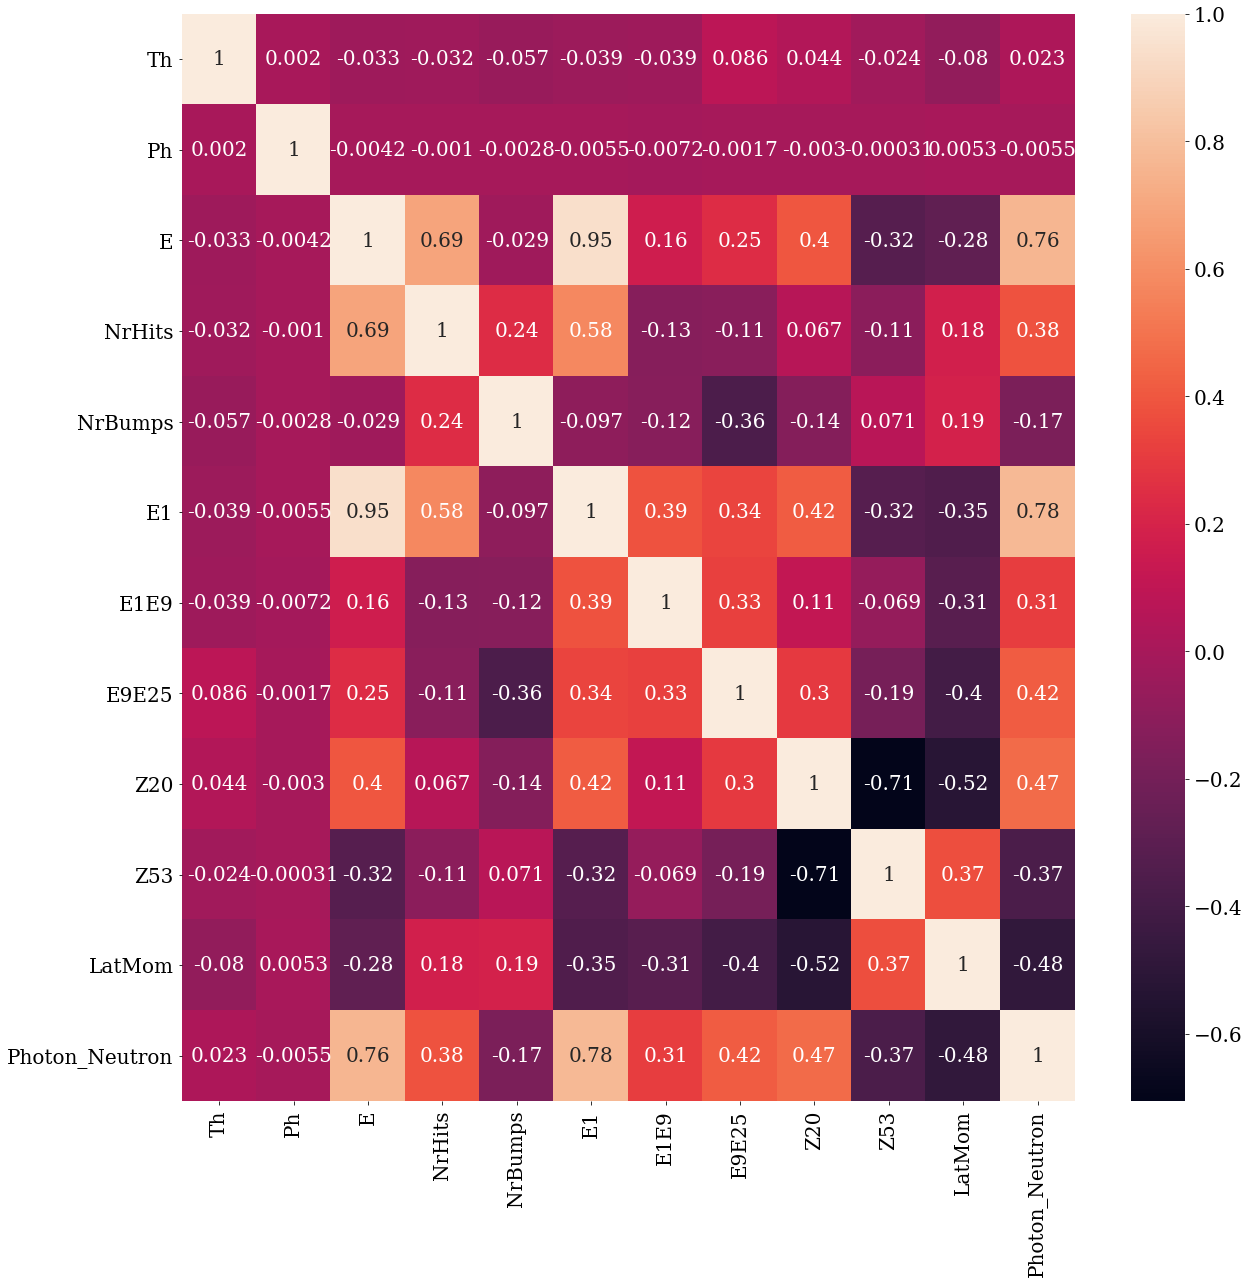

In [13]:
#                   #
# Prepping the data #
#                   #

# Importing data
from six import StringIO  
url1="https://jgmes.home.xs4all.nl/emc_neutron.txt"
s1=requests.get(url1).content
d1 = pd.read_csv(StringIO(s1.decode('utf-8')))

url2="https://jgmes.home.xs4all.nl/emc_gam.txt"
s2=requests.get(url2).content
d2 = pd.read_csv(StringIO(s2.decode('utf-8')))

# Slicing dataframes to ensure that theres the same amount of data in d1 and d2
d1 = d1[:len(d2)]

# Merging the 2 dataframes
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
df = [d1, d2]
df = pd.concat(df)

# Adding a column with 0 indicating photon and 1 indicating neutron
x = np.array([[0]*43360, [1]*43360])
y = x.flatten()
df['Photon_Neutron'] = y
type(df.Photon_Neutron)
data = df
print(data)

corrMatrix = data.corr()

plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [14]:
#
# Normalising the data
#

def NormalizeData(data, feature_list):
    """
    Normalize features in "feature_list" of dataFrame "data".
    New features will be added as columns to the dataFrame with label "_normal".
    The function returns the updated table.
    """
    #creating temporary dataframe so original doesn't change
    data_tmp = data.copy()

    # adding "_normal" and normalizing each feature
    for feature in feature_list:
        feature_new = feature + "_normal"
        data_tmp[feature_new] = (data_tmp[feature] - data_tmp[feature].mean()) / data_tmp[feature].std()
    return data_tmp

# Normalize some of the features and create new columns with normalized values:

data = NormalizeData(data,['Th','Ph','E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom'])

data[['Th_normal','Ph_normal','E_normal','NrHits_normal','NrBumps_normal','E1_normal','E1E9_normal','E9E25_normal','Z20_normal','Z53_normal','LatMom_normal']].describe()
#the mean values are all in the order of at most 10^(-13), which is approximate to 0
#the standard deviation is 1
#thus data is properly normalized

,Th_normal,Ph_normal,E_normal,NrHits_normal,NrBumps_normal,E1_normal,E1E9_normal,E9E25_normal,Z20_normal,Z53_normal,LatMom_normal
count,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04,8.672000e+04
mean,-1.549560e-14,-3.445122e-17,-8.507327e-15,-2.686697e-14,1.085754e-13,1.073066e-14,-2.841933e-14,1.228935e-13,-2.905176e-14,9.877490e-17,-3.137680e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.684920e+00,-1.732347e+00,-1.287653e+00,-2.081266e+00,-2.448071e-01,-1.098021e+00,-2.940736e+00,-6.842732e+00,-5.267423e+00,-4.314271e-01,-2.105554e+00
25%,-8.730802e-01,-8.666095e-01,-8.413464e-01,-7.671033e-01,-2.448071e-01,-8.227726e-01,-7.991258e-01,-2.355885e-01,-8.196808e-02,-3.885214e-01,-9.825661e-01
50%,-4.131188e-02,5.281220e-03,-3.126851e-01,2.139455e-02,-2.448071e-01,-3.959548e-01,8.068192e-02,4.087125e-01,4.248537e-01,-3.351743e-01,1.797321e-01
75%,8.414437e-01,8.620703e-01,7.606432e-01,6.784761e-01,-2.448071e-01,6.968512e-01,8.326236e-01,5.738206e-01,5.071228e-01,-4.948565e-02,9.980464e-01
max,2.105499e+00,1.729140e+00,2.425194e+00,5.672295e+00,1.666318e+01,3.076156e+00,1.997670e+00,8.541666e-01,6.603863e-01,1.755884e+01,1.257516e+00


In [18]:
#
#Defining the classifiers
#

def Classify(classifier, data, params,
             prop_test=0.3, feature_list=['E','NrHits'], 
             plot_ds=False, plot_tree=False, plot_network=False):
    """
    Use "classifier" algorithm to classify dataset data. Use feature list feature_list
    and use prop_test fraction of the data as test sample, rest for training.
    The function returns an updated dataset including a column with predicted class.
    """
    
    assert 0<prop_test<1
     
    #
    # make a copy of the dataframe. The original table will not be altered.
    #
    data_tmp = data.copy()
    #
    # Add a column specifying whether event is used for training or for testing
    #
    data_tmp['is_train'] = np.random.uniform(0, 1, len(data_tmp)) <= (1-prop_test)
    #
    # Extract two seperate datasets for training (train) and testing (test)
    #
    train, test = data_tmp[data_tmp['is_train']==True], data_tmp[data_tmp['is_train']==False]
    
    
    if   (classifier=="DT"):
        # we create an instance of Decision Tree Classifier.
        clf = tree.DecisionTreeClassifier(criterion='entropy',
                                          min_impurity_decrease=params[0],
                                          max_depth=params[1])
    elif (classifier=="RF"):
        # we create an instance of Random Forest Classifier.
        clf = RandomForestClassifier(n_estimators=params[0], 
                                     max_features=params[1])
    elif (classifier=="kNN"):
        # we create an instance of kNN Classifier.
        clf = neighbors.KNeighborsClassifier(n_neighbors=params[0])
    elif (classifier=="MLP"):
        # we create an instance of MLP Classifier.
        clf = MLPClassifier(solver='lbfgs', activation='logistic', #solver=quasi-Newton, activation=sigmoid
                            max_iter=5000, 
                            hidden_layer_sizes=params[0])
    else:
        print("<E> Classifier not implemented: ", classifier)
        return None
    
    # Fit the data with the selected classifier...
    clf.fit(train[feature_list],train['Photon_Neutron'])
    
    #evaluate the training points
    trainpred = clf.predict(train[feature_list]) # majority vote result
    train['prediction'] = [x for x in trainpred]
   
    # Predict on the testing points       
    testpred = clf.predict(test[feature_list])   # majority vote result
    test['prediction'] = [x for x in testpred]
 
    data_update = train.append(test)
     
    # Make it possible to plot the decision surface if plot_ds flag set to True and nr of features equals 2.
    if (plot_ds) & (len(feature_list)==2):
        PlotDecisionSurface(clf,data_update,feature_list)

    # In the case the classifier is a decision tree, allow for the possibility to plot the tree, 
    # only when plot_tree is set to True.
    if (plot_tree) & (classifier=="DT"): 
        PlotTree(clf, feature_list)

    # Return the updated version of the dataFrame including labels "is_train" and "predicted".
    return data_update

#
# GetNrOfSuccesses(dataFrame): returns fraction of succesfull classifications for training and test 
#                              part of the data table and used as the metric for the fruit analysis!

def GetNrOfSuccesses(data):
    """
    Reads as input DataFrame "data" and return the fraction of successfull classifications of
    the training and test part of the table. This function only works with an updated DataFrame
    that includes the columns "is_train" and "prediction", generated by Classify() function.
    """
    
    nrtrain_instances = len(data[(data.is_train == True)])
    nrtest_instances  = len(data[(data.is_train == False)])
    
    nrtrain_success = len(data[(data.is_train == True)  & (data.prediction == data.Photon_Neutron)])
    nrtest_success  = len(data[(data.is_train == False) & (data.prediction == data.Photon_Neutron)])
    
    return (nrtrain_success/nrtrain_instances), (nrtest_success/nrtest_instances)

#
# PlotTree: a procedure that displays the tree structure of classifier clf...
#

def PlotTree(clf, feature_list):
    """
    Plot the decision tree of classifier "clf" with list of features given in "feature_list".
    The function creates a file called "simple.dotfile" and corresponding "simpletree.png".
    To generate the png-file, "dot" needs to be installed on your OS.
    The png-file is displayed in the notebook.
    """
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data)
    tree_string = dot_data.getvalue()
    tree_string = re.sub('samples = [0-9]+\\\\n', '', tree_string) # Remove line starting with samples = ...
    for i, feature in enumerate(feature_list):
        tree_string = re.sub('X\[{}\]'.format(i), feature, tree_string) # Replace X[..] with true feature name
    with open('simple.dotfile', 'w+') as f:
        f.write(tree_string)
    !dot -Tpng simple.dotfile > simpletree.png  # "dot" needs to be installed on your OS; see info https://graphviz.org/documentation/ 
    display(Image(filename ='simpletree.png'))
    return  

#
# PlotDecisionSurface: function that creates decision surface based on classifier clf
# and features in feature_list of dataFrame data. It uses "meshgrid" of numpy to generate
# grid of points to evaluate by classifier. For plotting, it uses "pcolormesh" of matplotlib.
#

def PlotDecisionSurface(clf, data, feature_list, label='Photon_Neutron', step=0.01):
    """
    Function that creates a decision surface of classifier "clf"
    together with features from the two entries of the "features_list" of "data"
    """
    X = data[feature_list[0]].values
    Y = data[feature_list[1]].values
    
    # colors associated with the three classes, light is used for surface and bold for datapoints
    cmap_light = ListedColormap(['#ffde9e', '#b8ea9d', '#ffbaba'])
    cmap_bold  = ListedColormap(['#ff8c28', '#11bb11', '#ff0000'])
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max] x [y_min, y_max].
    x_min, x_max = X.min(), X.max()
    y_min, y_max = Y.min(), Y.max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Put the result into a color plot
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    # Plot the data points
    plt.scatter(X, Y, s=40, c=data[label], cmap=cmap_bold)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(feature_list[0])
    plt.ylabel(feature_list[1])
    plt.show()
    return

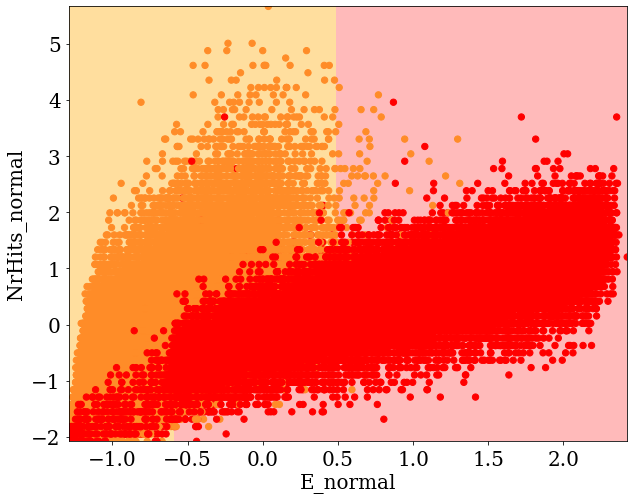

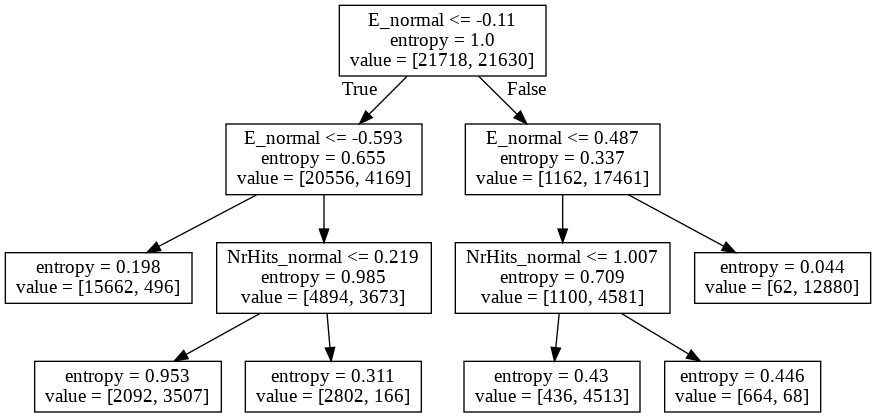

Success rate:  0.9234105379717634 0.9228534538411879


In [19]:
#
# Classify function inputs for: Decision Tree
#
classifier            = 'DT'
min_impurity_decrease = 0.035
max_depth             = None
params                = [min_impurity_decrease, max_depth]
prop_test             = 0.5
feature_list          = ['E_normal', 'NrHits_normal'] #Q: do you really have to use _normal features?
plot_ds               = True
plot_tree             = True
plot_network          = False

data_new = Classify(classifier=classifier, data=data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

train_success, test_success = GetNrOfSuccesses(data_new)
print('Success rate: ', train_success, test_success)

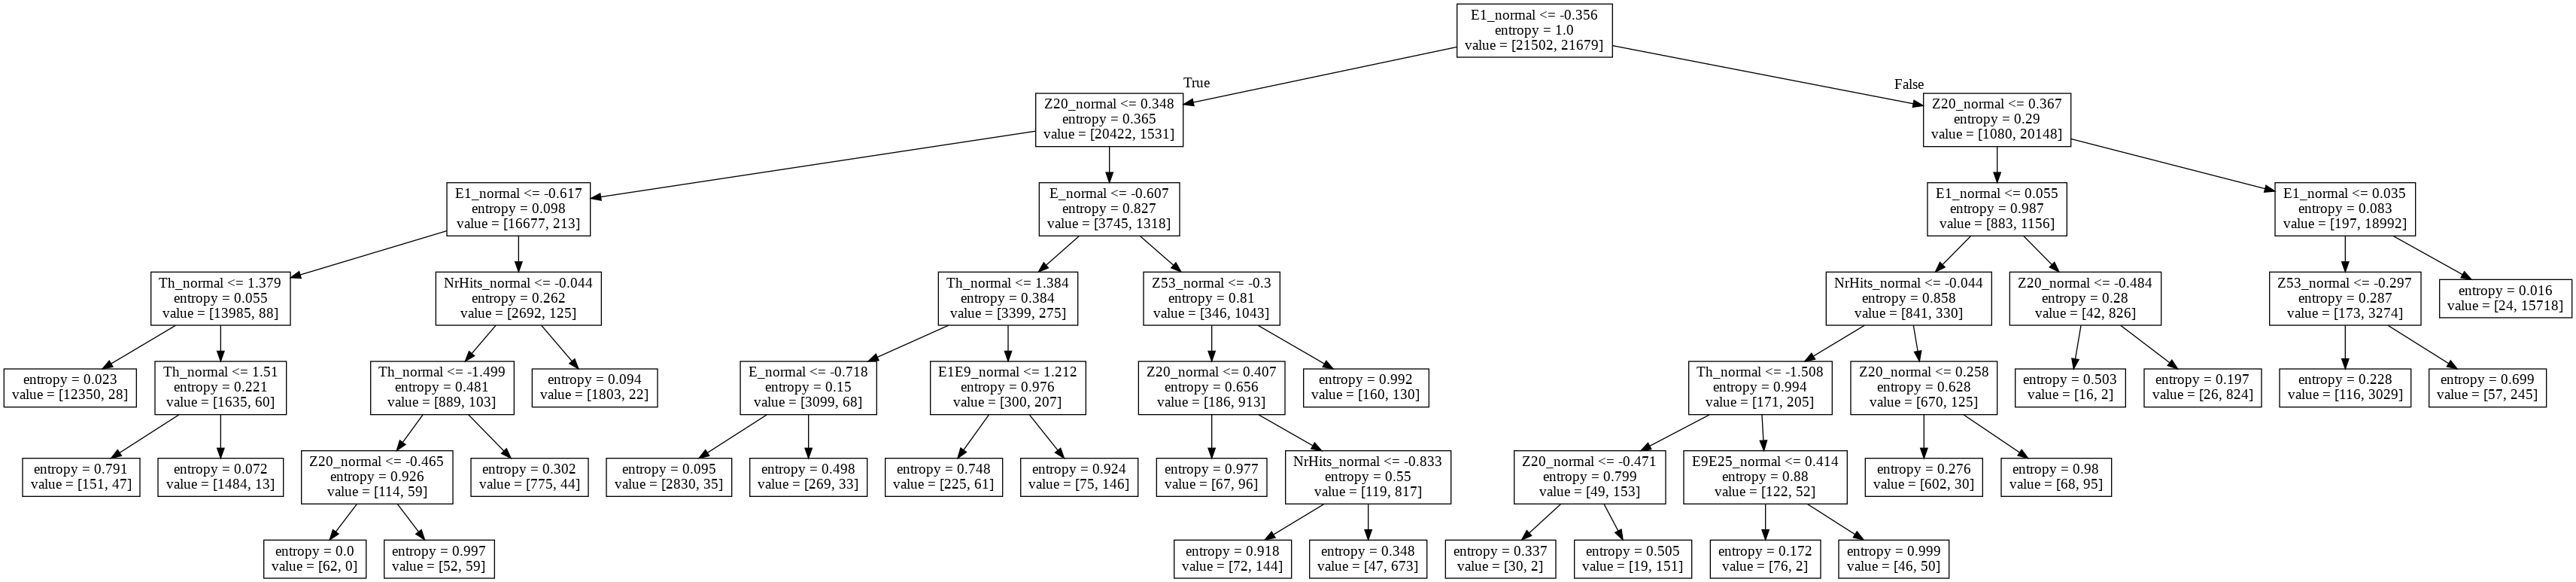

Success rate:  0.9741089831175749 0.9713130756333402


In [20]:
#
# Using the DT classifier to determine which features are most powerful
#
classifier            = 'DT'
min_impurity_decrease = 0.001
max_depth             = None
params                = [min_impurity_decrease, max_depth]
prop_test             = 0.5                                #50% test data
feature_list          = ['Th_normal','Ph_normal','E_normal','NrHits_normal','NrBumps_normal','E1_normal','E1E9_normal','E9E25_normal','Z20_normal','Z53_normal','LatMom_normal']      #Q: do you really have to use _normal features?
plot_ds               = False
plot_tree             = True
plot_network          = False

data_new = Classify(classifier=classifier, data=data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

train_success, test_success = GetNrOfSuccesses(data_new)
print('Success rate: ', train_success, test_success)

# We can see that the most powerful features are E1 and Z20

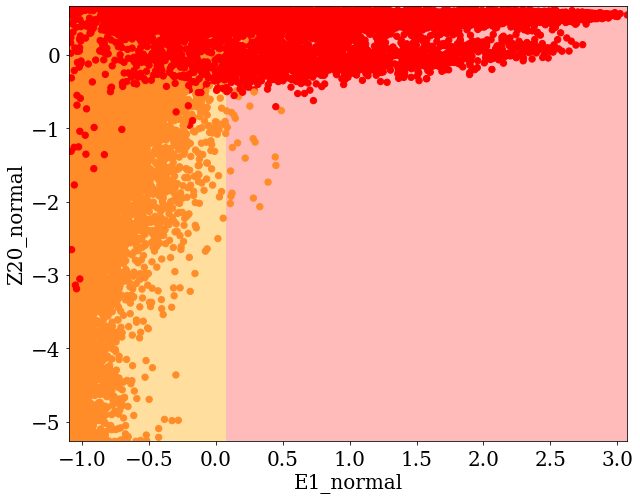

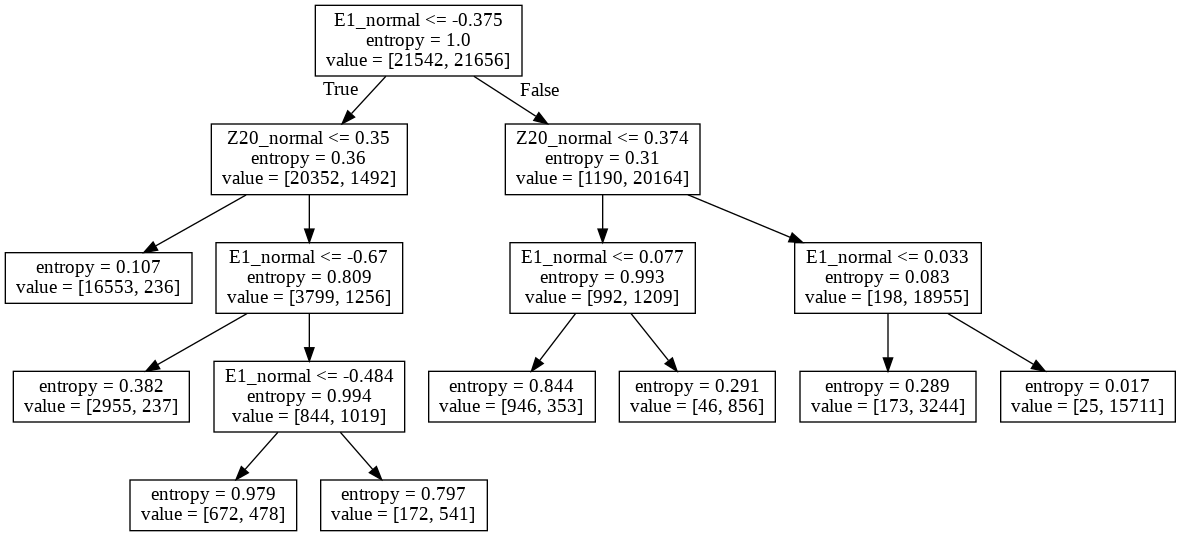

Success rate:  0.9601833418213807 0.9593309131014199


In [23]:
#
# Creating DT classifier with features E1 and Z20
#
classifier            = 'DT'
min_impurity_decrease = 0.003
max_depth             = None
params                = [min_impurity_decrease, max_depth]
prop_test             = 0.5                                #50% test data
feature_list          = ['E1_normal','Z20_normal']      
plot_ds               = True
plot_tree             = True
plot_network          = False

data_new = Classify(classifier=classifier, data=data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

train_success, test_success = GetNrOfSuccesses(data_new)
print('Success rate: ', train_success, test_success)

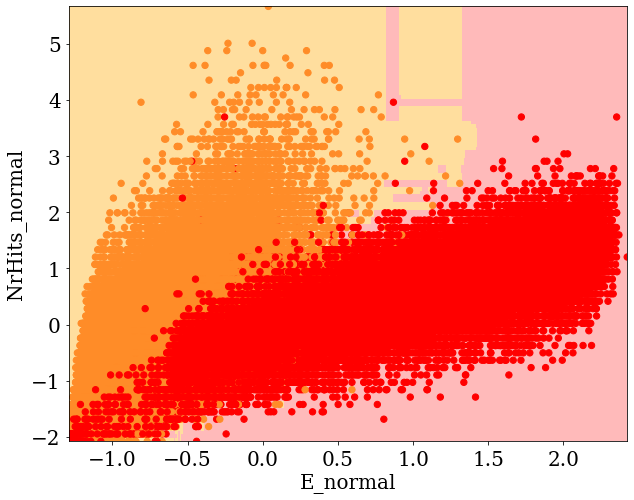

Success rate:  0.9994895775018935 0.909104902639883


In [24]:
#
# Classify function inputs for: Random Forest
#
classifier            = 'RF'
n_estimators          = 300
max_features          = 'auto'
params                = [n_estimators,max_features]
prop_test             = 0.3
feature_list          = ['E_normal', 'NrHits_normal']
plot_ds               = True
plot_tree             = False
plot_network          = False

data_new = Classify(classifier=classifier, data=data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

train_success, test_success = GetNrOfSuccesses(data_new)
print('Success rate: ', train_success, test_success)

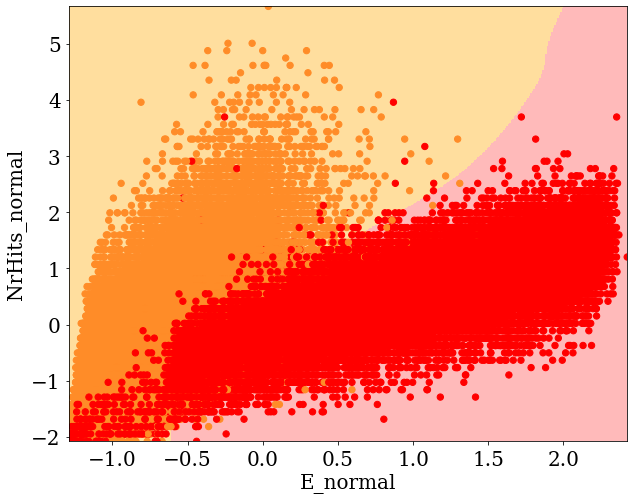

Success rate:  0.9362217172216184 0.9376394552589059


In [25]:
#
# Classify function inputs for: Multi-Layer Perceptron
#
classifier            = 'MLP'
hidden_layers         = (5,)
params                = [hidden_layers]
prop_test             = 0.3
feature_list          = ['E_normal', 'NrHits_normal']
plot_ds               = True
plot_tree             = False
plot_network          = True

data_new = Classify(classifier=classifier, data=data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

train_success, test_success = GetNrOfSuccesses(data_new)
print('Success rate: ', train_success, test_success)

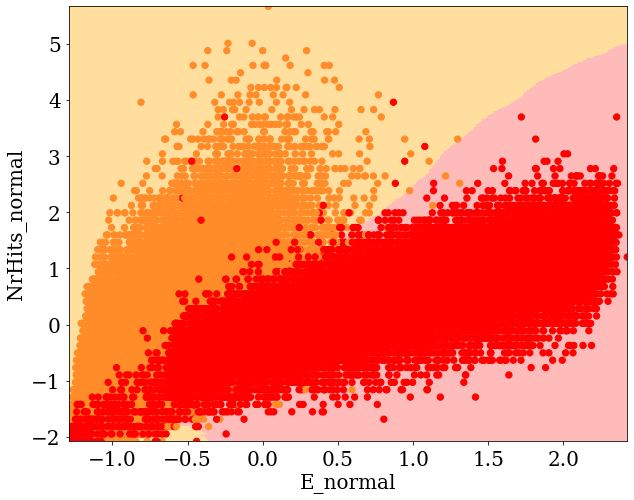

Success rate:  0.9377704133296512 0.9358879541462513


In [26]:
#
# Classify function inputs for: kNN
#
classifier            = 'kNN'
n_neighbours          = 40
params                = [n_neighbours]
prop_test             = 0.5
feature_list          = ['E_normal', 'NrHits_normal']
plot_ds               = True
plot_tree             = False
plot_network          = False

data_new = Classify(classifier=classifier, data=data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

train_success, test_success = GetNrOfSuccesses(data_new)
print('Success rate: ', train_success, test_success)

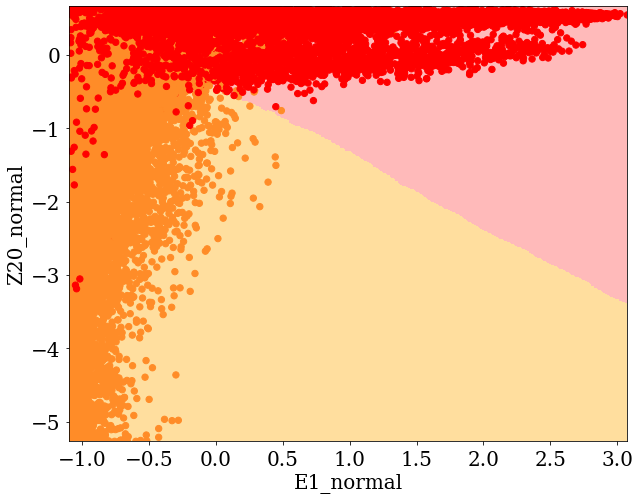

Success rate:  0.9634593646912271 0.964492402757603


In [27]:
#
# Classify function inputs for: kNN, for features E1 and Z20
#
classifier            = 'kNN'
n_neighbours          = 30
params                = [n_neighbours]
prop_test             = 0.5                         #50% test data
feature_list          = ['E1_normal', 'Z20_normal']
plot_ds               = True
plot_tree             = False
plot_network          = False

data_new = Classify(classifier=classifier, data=data, params=params, prop_test=prop_test, feature_list=feature_list, 
                    plot_ds=plot_ds, plot_tree=plot_tree, plot_network=plot_network)

train_success, test_success = GetNrOfSuccesses(data_new)
print('Success rate: ', train_success, test_success)

In [36]:
#
# Cross validation (returns for each validation the success rates)
#
def kNN_test(data=data, 
             k=30, 
             reps=1, 
             prop_test=0.3, 
             feature_list=['E1_normal', 'Z20_normal'], 
             plot_ds=False):
    """ 
    Function that performs a kNN classification for "reps" cross validations. It returns the error rate for
    train and test samples.
    """
    
    assert 0<prop_test<1
      
    train_result = []
    test_result  = []
        
    for rep in range(reps):
      
        dn = kNN_classify(data=data, k=k, prop_test=prop_test, feature_list=feature_list, plot_ds=plot_ds)
        
        success_train, success_test = getNrOfSuccesses(dn)
        
        train_result.append(success_train)
        test_result.append(success_test)
        
    return [train_result, test_result]

In [ ]:
#
# Try to find the optimum value of "k".
# Hence run the kNN_test for several values of "k" and study the resulting error rate
#
klist = np.arange(1,100,2)                             # list of k-values to study
features_sel = ['E1_normal', 'Z20_normal']             # list of input features

k_result = []
for k in klist:
    result = kNN_test(data=data, k=k, reps=5, prop_test=0.3, feature_list=features_sel)
    train_error = 1 - np.mean(result[0]) # take the average of all the cross validations as result
    test_error  = 1 - np.mean(result[1]) # ...same for test samples
    k_result.append([train_error,test_error])

